Testing If Google Drive is mounted

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls

drive/  sample_data/


In [5]:
cd/content/drive/MyDrive/nalaiyathiran


/content/drive/MyDrive/nalaiyathiran


In [6]:
ls

A2Zdata/  A2Zdata.h5  A2Zdata.zip


In [7]:
pwd

'/content/drive/MyDrive/nalaiyathiran'

In [ ]:
!unzip A2Zdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: A2Zdata/training/H/Image_1666640068.7893028.jpg  
  inflating: A2Zdata/training/H/Image_1666640069.0229783.jpg  
  inflating: A2Zdata/training/H/Image_1666640069.2740915.jpg  
  inflating: A2Zdata/training/H/Image_1666640069.4986484.jpg  
  inflating: A2Zdata/training/H/Image_1666640069.732095.jpg  
  inflating: A2Zdata/training/H/Image_1666640069.9665518.jpg  
  inflating: A2Zdata/training/H/Image_1666640070.2463908.jpg  
  inflating: A2Zdata/training/H/Image_1666640070.4681196.jpg  
  inflating: A2Zdata/training/H/Image_1666640071.2157736.jpg  
  inflating: A2Zdata/training/H/Image_1666640071.8422866.jpg  
  inflating: A2Zdata/training/H/Image_1666640072.2195604.jpg  
  inflating: A2Zdata/training/H/Image_1666640072.4681218.jpg  
  inflating: A2Zdata/training/H/Image_1666640073.1584034.jpg  
  inflating: A2Zdata/training/H/Image_1666640073.4422643.jpg  
  inflating: A2Zdata/training/H/Image_1666640073.617418.jpg  
  infl

Image Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [10]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [11]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/nalaiyathiran/A2Zdata/training",target_size=(100,100),class_mode='categorical',batch_size=75)


Found 7132 images belonging to 26 classes.


In [12]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/nalaiyathiran/A2Zdata/testing",target_size=(100,100),class_mode='categorical',batch_size=75)


Found 2862 images belonging to 26 classes.


In [13]:
x_train.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

Model

In [14]:
from tensorflow.keras.models import Sequential

Layers

In [15]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [16]:
model = Sequential()

In [17]:
model.add(Convolution2D(32, (3,3), input_shape=(100,100,3),activation = 'relu')) #Feature map

In [18]:
model.add(MaxPooling2D(pool_size = (2,2))) #Pooled matrix

In [19]:
model.add(Flatten())

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

In [22]:
model.add(Dense(26,activation='softmax'))

Compile

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
len(x_train)

96

In [25]:
len(x_test)

39

Fit the Model

In [26]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
96/96 [==============================] - 168s 2s/step - loss: 2.4762 - accuracy: 0.5006 - val_loss: 0.7348 - val_accuracy: 0.7628
Epoch 2/5
96/96 [==============================] - 147s 2s/step - loss: 0.3840 - accuracy: 0.8850 - val_loss: 0.4430 - val_accuracy: 0.9113
Epoch 3/5
96/96 [==============================] - 147s 2s/step - loss: 0.1977 - accuracy: 0.9397 - val_loss: 0.4319 - val_accuracy: 0.9238
Epoch 4/5
96/96 [==============================] - 145s 2s/step - loss: 0.1413 - accuracy: 0.9586 - val_loss: 0.3511 - val_accuracy: 0.9382
Epoch 5/5
96/96 [==============================] - 149s 2s/step - loss: 0.0954 - accuracy: 0.9700 - val_loss: 0.2950 - val_accuracy: 0.9486


Save the model

In [27]:
model.save('A2Z.h5')

In [28]:
ls

A2Zdata/  A2Zdata.h5  A2Zdata.zip  A2Z.h5


Test the model

In [29]:
import numpy as np
from tensorflow.keras.models import load_model

In [30]:
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('A2Z.h5')

In [32]:
pwd

'/content/drive/MyDrive/nalaiyathiran'

In [67]:
img=image.load_img(r'/content/drive/MyDrive/nalaiyathiran/A2Zdata/testing/Y/Image_1667328891.1069646.jpg')

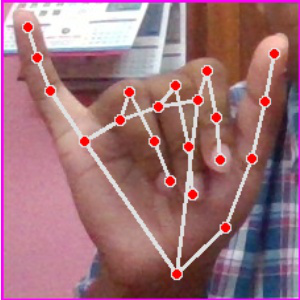

In [68]:
img

In [69]:
img=image.load_img(r'/content/drive/MyDrive/nalaiyathiran/A2Zdata/testing/Y/Image_1667328891.1069646.jpg',target_size=(100,100))

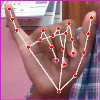

In [70]:
img

In [71]:
x=image.img_to_array(img)

In [72]:
x

array([[[196.,  40., 201.],
        [247.,   7., 238.],
        [240.,  14., 235.],
        ...,
        [238.,  13., 231.],
        [234.,  16., 224.],
        [249.,   6., 248.]],

       [[208.,  34., 207.],
        [243., 132., 200.],
        [219., 146., 175.],
        ...,
        [144.,  99., 102.],
        [143., 110.,  91.],
        [204.,  56., 178.]],

       [[202.,  36., 206.],
        [241., 144., 195.],
        [224., 150., 185.],
        ...,
        [149., 110.,  81.],
        [148., 110.,  87.],
        [205.,  58., 173.]],

       ...,

       [[203.,  37., 199.],
        [207., 118., 176.],
        [192., 131., 149.],
        ...,
        [116., 133., 141.],
        [138., 166., 170.],
        [209.,  93., 226.]],

       [[206.,  32., 207.],
        [216., 118., 179.],
        [186., 128., 140.],
        ...,
        [123., 133., 135.],
        [132., 171., 153.],
        [212.,  96., 221.]],

       [[198.,  37., 201.],
        [238.,  62., 222.],
        [239.,  

In [73]:
x.shape

(100, 100, 3)

In [74]:
x= np.expand_dims(x,axis=0)

In [75]:
x

array([[[[196.,  40., 201.],
         [247.,   7., 238.],
         [240.,  14., 235.],
         ...,
         [238.,  13., 231.],
         [234.,  16., 224.],
         [249.,   6., 248.]],

        [[208.,  34., 207.],
         [243., 132., 200.],
         [219., 146., 175.],
         ...,
         [144.,  99., 102.],
         [143., 110.,  91.],
         [204.,  56., 178.]],

        [[202.,  36., 206.],
         [241., 144., 195.],
         [224., 150., 185.],
         ...,
         [149., 110.,  81.],
         [148., 110.,  87.],
         [205.,  58., 173.]],

        ...,

        [[203.,  37., 199.],
         [207., 118., 176.],
         [192., 131., 149.],
         ...,
         [116., 133., 141.],
         [138., 166., 170.],
         [209.,  93., 226.]],

        [[206.,  32., 207.],
         [216., 118., 179.],
         [186., 128., 140.],
         ...,
         [123., 133., 135.],
         [132., 171., 153.],
         [212.,  96., 221.]],

        [[198.,  37., 201.],
       

In [76]:
x.shape

(1, 100, 100, 3)

In [77]:
y= np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 66ms/step


In [78]:
y

array([24])

In [79]:
x_train.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [80]:
index=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [81]:
index[y[0]]

'Y'

In [57]:
img=image.load_img(r'/content/drive/MyDrive/nalaiyathiran/A2Zdata/training/B/Image_1666335447.728338.jpg',target_size=(100,100))

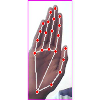

In [58]:
img

In [59]:
x=image.img_to_array(img)

In [60]:
x=np.expand_dims(x,axis=0)

In [61]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 56ms/step


In [62]:
y

array([1])

In [63]:
index=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [64]:
index[y[0]]

'B'